<a href="https://colab.research.google.com/github/polyscoobydoo/Villozi-gp/blob/main/%D0%94%D0%BE%D1%81%D1%82%D1%83%D0%BF%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%B8%20%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install blocksnet iduedu mapclassify -qq

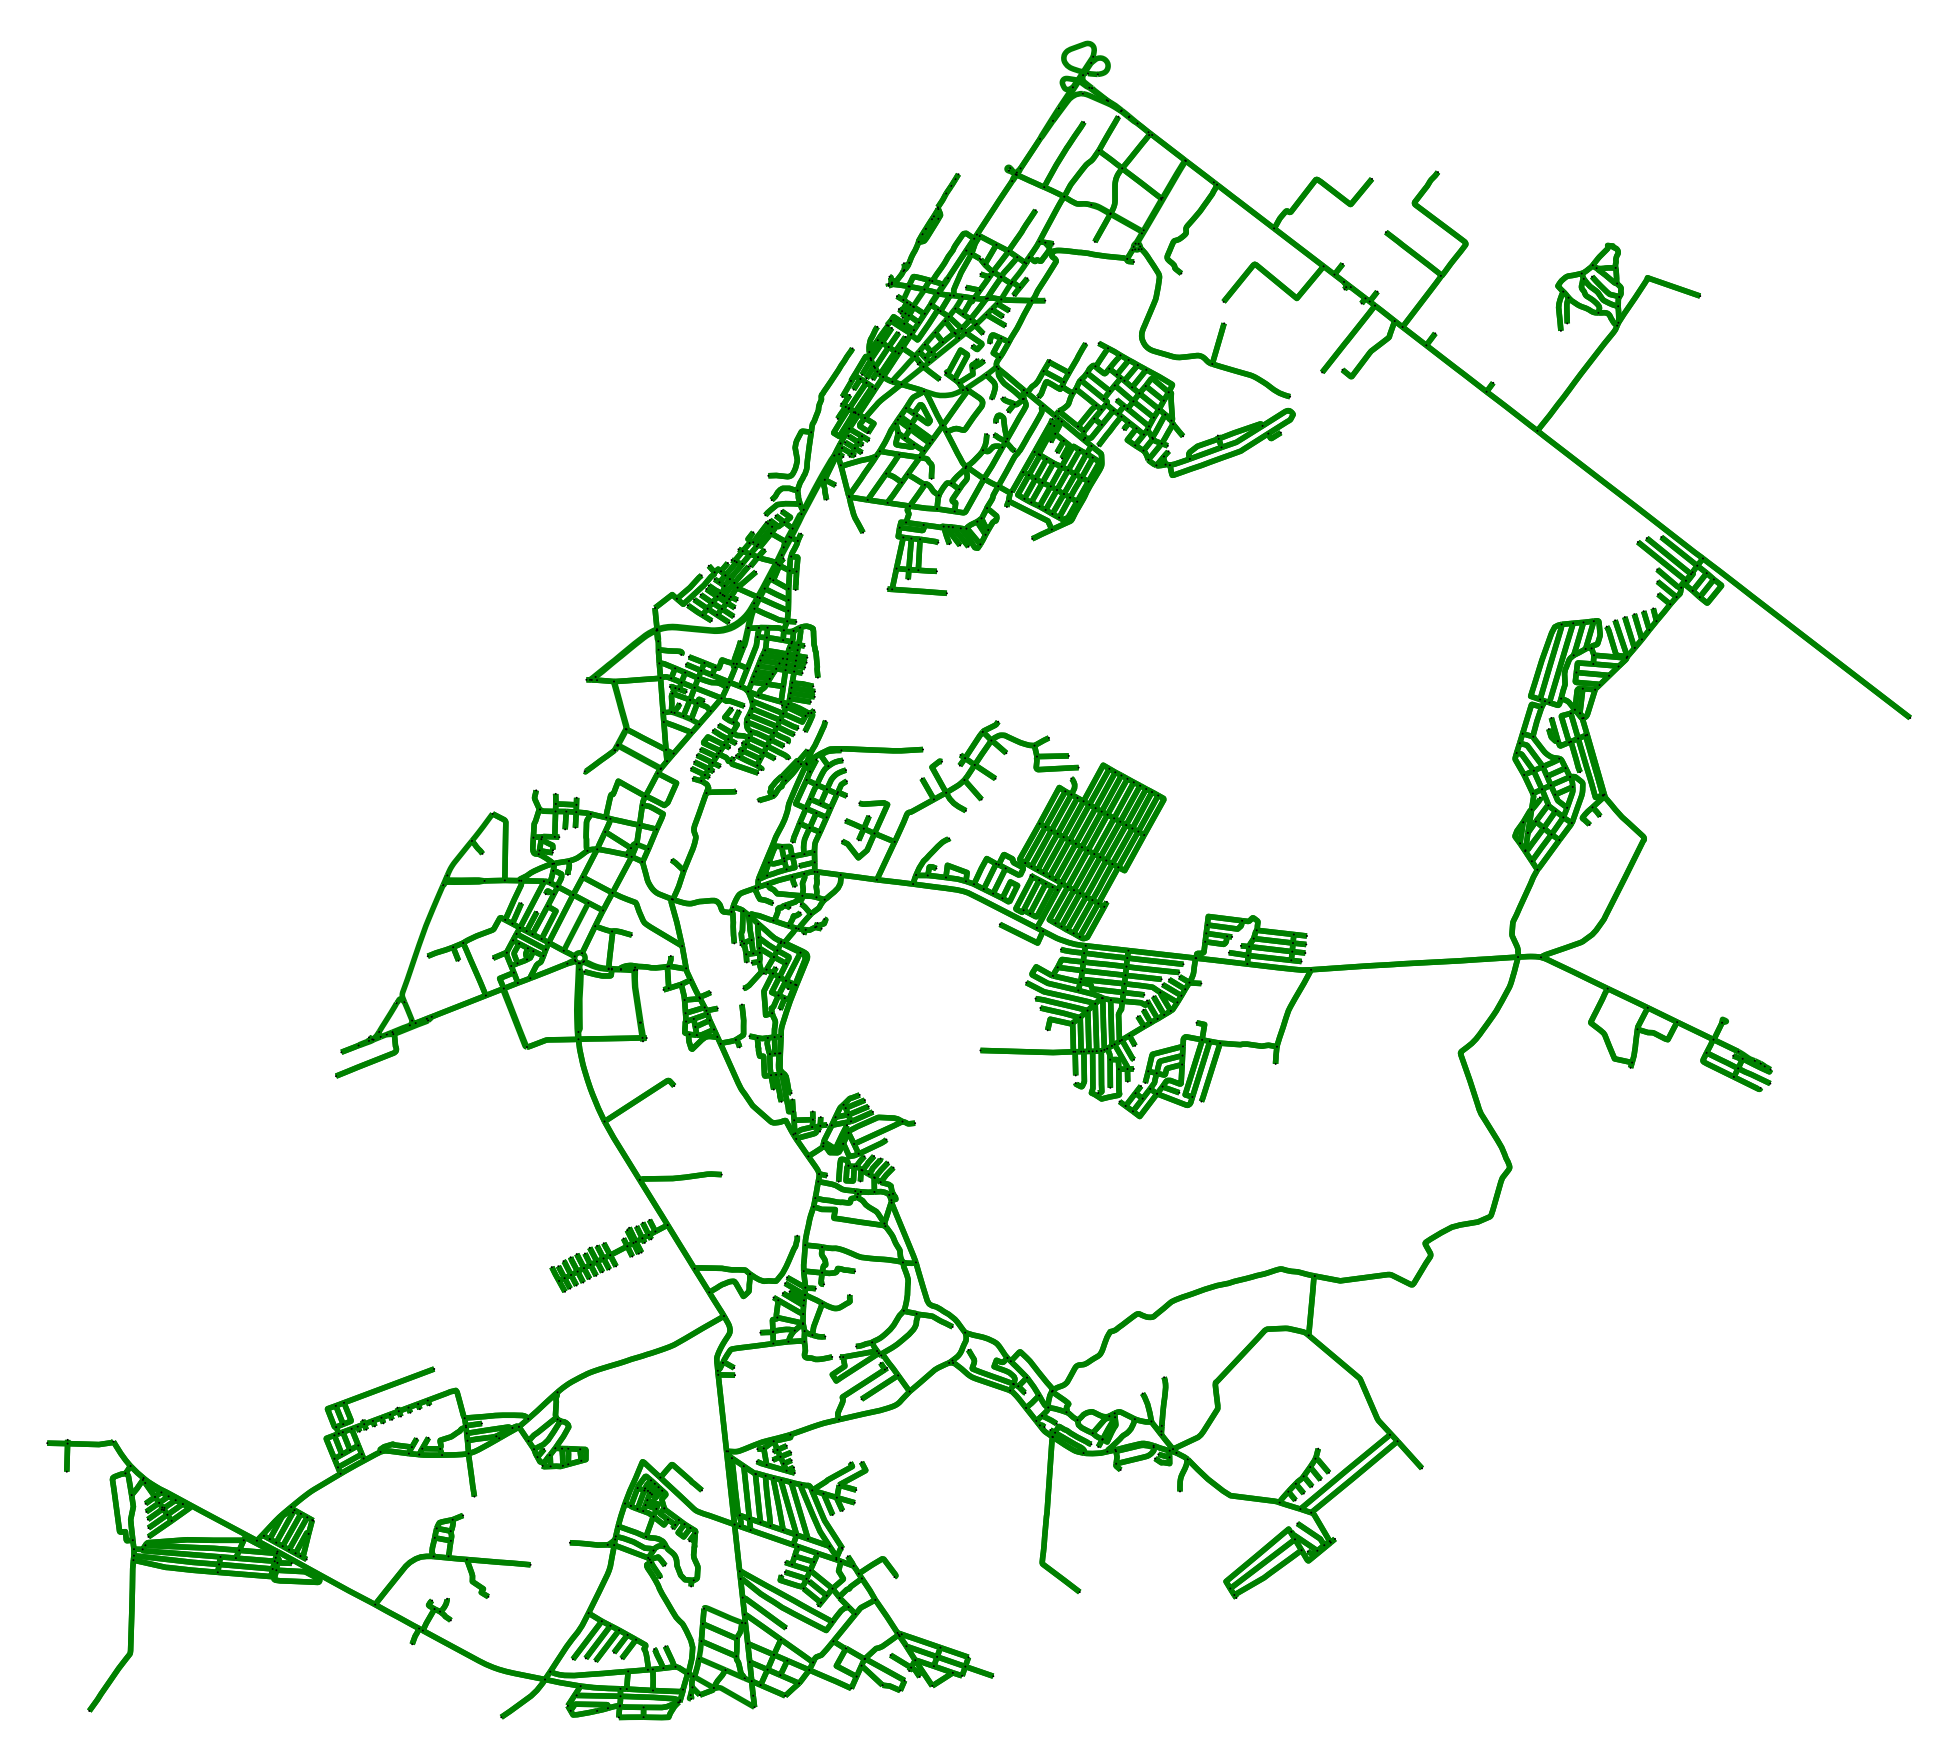

In [ ]:
import geopandas as gpd
import os

data_path = '/content/data'
blocks = gpd.read_file(os.path.join(data_path, 'blocks.geojson'))

from iduedu import get_boundary
bounds = get_boundary(osm_id=1650679) # Виллозское гп

from iduedu import get_drive_graph
G_drive = get_drive_graph(polygon=bounds, additional_edgedata=['highway', 'maxspeed', 'reg', 'ref','name'])

from blocksnet import AccessibilityProcessor
AccessibilityProcessor._fix_graph(G_drive)

import osmnx as ox
import matplotlib.pyplot as plt

fig, ax = ox.plot_graph(G_drive,
                    node_color='black',
                    edge_color='green',
                    bgcolor='white',
                    node_size=2,
                    edge_linewidth=4,
                    figsize=(25,25))

In [ ]:
fig.savefig(os.path.join(data_path,'drive_graph_image.png'))
n,e = ox.graph_to_gdfs(G_drive)
n

,y,x,highway,street_count,geometry
osmid,,,,,
8130763,6.624780e+06,336031.766632,traffic_signals,3,POINT (336031.767 6624780.345)
251864064,6.624943e+06,336119.015956,NaN,4,POINT (336119.016 6624942.988)
251864760,6.624635e+06,335958.814593,NaN,3,POINT (335958.815 6624635.395)
1392435625,6.624851e+06,335896.058079,NaN,3,POINT (335896.058 6624850.993)
8131335,6.626742e+06,337126.501117,NaN,4,POINT (337126.501 6626741.764)
...,...,...,...,...,...
11980443512,6.631070e+06,341030.456675,NaN,3,POINT (341030.457 6631070.206)
12023829310,6.620004e+06,340113.384708,NaN,1,POINT (340113.385 6620004.428)
12092465481,6.624461e+06,337301.803698,NaN,1,POINT (337301.804 6624460.938)


In [ ]:
e

length_meter  time_min  \
u           v           key                           
8130763     251864064   0         184.575     0.185   
            251864760   0         162.282     0.162   
            1392435625  0         152.999     0.153   
251864064   1392435844  0         311.765     0.468   
            8130763     0         184.575     0.185   
...                                   ...       ...   
12023829310 12023829315 0          49.646     0.074   
12092465481 12092465482 0          36.299     0.054   
12134918575 12134918574 0          25.951     0.039   
12391605356 12391605333 0           7.220     0.011   
            12391605305 0          50.416     0.076   

                                                                      geometry  \
u           v           key                                                      
8130763     251864064   0    LINESTRING (336031.767 6624780.345, 336036.873...   
            251864760   0    LINESTRING (336031.767 6624780.345, 336025.526...   
            1392435625  0    LINESTRING (336031.767 6624780.345, 336021.597...   
251864064   1392435844  0    LINESTRING (336119.016 6624942.988, 336109.467...   
            8130763     0    LINESTRING (336119.016 6624942.988, 336066.451...   
...                                                                        ...   
12023829310 12023829315 0    LINESTRING (340113.385 6620004.428, 340096.629...   
12092465481 12092465482 0    LINESTRING (337301.804 6624460.938, 337335.197...   
12134918575 12134918574 0    LINESTRING (338941.355 6629831.400, 338961.148...   
12391605356 12391605333 0    LINESTRING (336162.145 6626307.282, 336168.507...   
            12391605305 0    LINESTRING (336162.145 6626307.282, 336154.633...   

                                 highway     maxspeed  reg  \
u           v           key                                  
8130763     251864064   0        primary  1000.000000    2   
            251864760   0        primary  1000.000000    2   
            1392435625  0      secondary  1000.000000    2   
251864064   1392435844  0    residential   666.666667    3   
            8130763     0        primary  1000.000000    2   
...                                  ...          ...  ...   
12023829310 12023829315 0    residential   666.666667    3   
12092465481 12092465482 0    residential   666.666667    3   
12134918575 12134918574 0    residential   666.666667    3   
12391605356 12391605333 0    residential   666.666667    3   
            12391605305 0    residential   666.666667    3   

                                           name  ref  
u           v           key                           
8130763     251864064   0       проспект Ленина  NaN  
            251864760   0       проспект Ленина  NaN  
            1392435625  0         улица Свободы  NaN  
251864064   1392435844  0       улица Равенства  NaN  
            8130763     0       проспект Ленина  NaN  
...                                         ...  ...  
12023829310 12023829315 0      Гатчинская улица  NaN  
12092465481 12092465482 0                   NaN  NaN  
12134918575 12134918574 0            улица Мира  NaN  
12391605356 12391605333 0    улица Освобождения  NaN  
            12391605305 0         улица Спирина  NaN  

[5443 rows x 8 columns]

In [ ]:
n.to_file(os.path.join(data_path,"G_drive_nodes.geojson"))
e.to_file(os.path.join(data_path,"G_drive_edges.geojson"))

Доступность

In [ ]:
from blocksnet import AccessibilityProcessor

ap = AccessibilityProcessor(blocks)

acc_mx = ap.get_accessibility_matrix(G_drive)
acc_mx.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,0.000000,8.625000,7.531250,10.054688,12.398438,10.210938,10.867188,11.625000,11.625000,10.195312,...,8.476562,12.265625,9.718750,9.851562,8.578125,14.687500,9.960938,18.640625,8.921875,8.921875
1,8.625000,0.000000,2.638672,5.160156,7.507812,5.316406,5.976562,6.734375,6.734375,5.304688,...,15.984375,19.781250,4.828125,4.960938,6.835938,9.796875,5.070312,23.937500,4.031250,4.031250
2,7.433594,2.541016,0.000000,2.755859,5.105469,2.914062,3.574219,4.332031,4.332031,2.900391,...,14.796875,18.578125,2.423828,2.556641,5.644531,7.394531,2.667969,21.546875,1.626953,1.626953
3,10.039062,5.148438,2.683594,0.000000,2.369141,0.178955,0.838867,1.595703,1.595703,0.163940,...,16.250000,19.843750,1.173828,0.189941,8.250000,5.082031,0.091003,19.234375,1.119141,1.119141
4,10.429688,5.539062,3.072266,0.389893,0.000000,0.568848,1.228516,1.986328,1.986328,0.554199,...,16.640625,20.234375,1.564453,0.580078,8.640625,5.472656,0.480957,19.625000,1.508789,1.508789


In [ ]:
acc_mx.to_pickle(os.path.join(data_path, 'acc_mx.pickle'))

CRS : EPSG:32636
Blocks : 505
Service types : 0/66
Buildings : 0
Services : 0



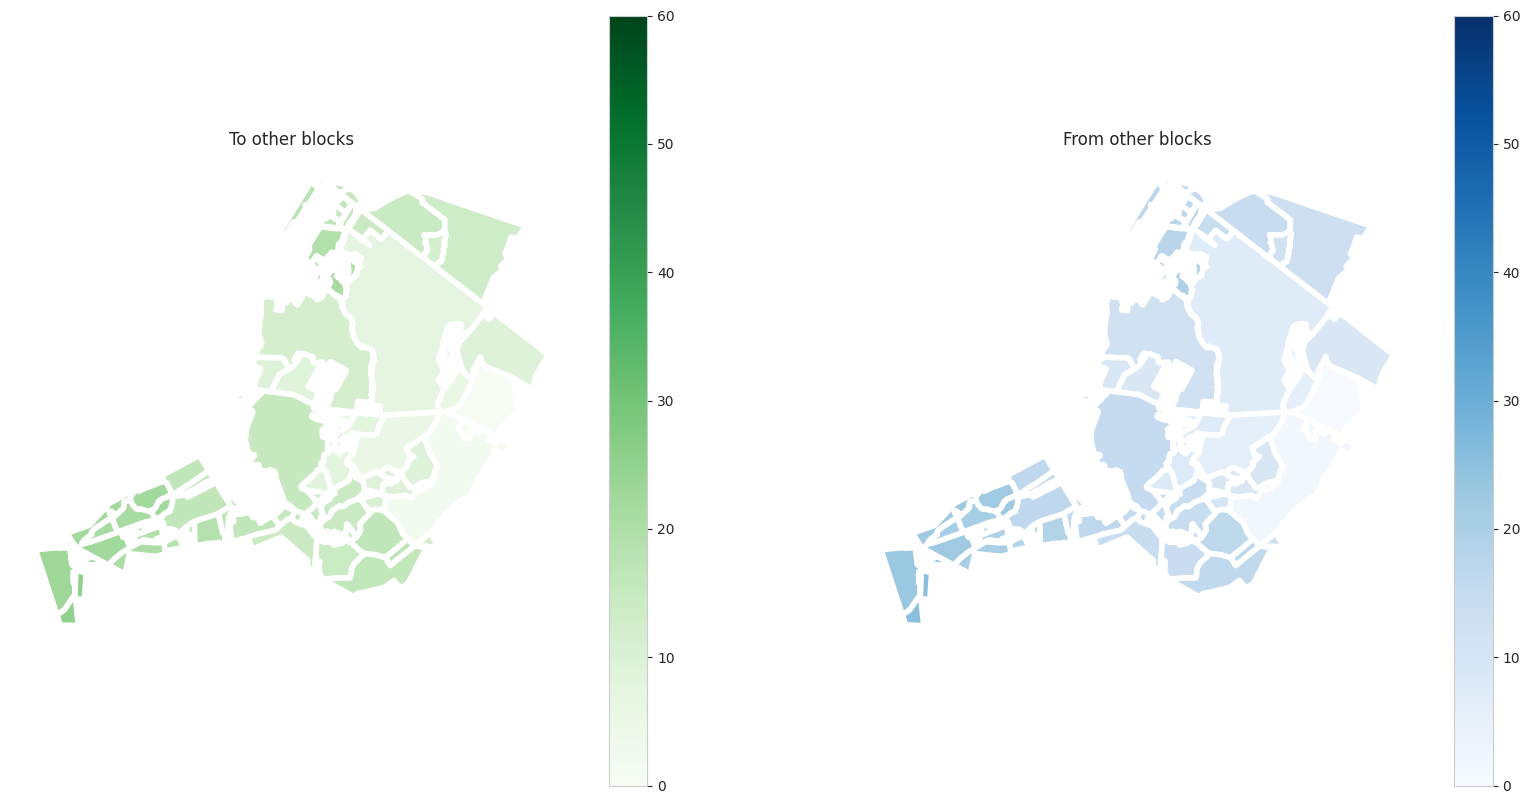

In [44]:
from blocksnet.models import City
blocks['land_use'] = None

city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

print(city)

city.to_pickle(os.path.join(data_path,'city_model.pickle'))

from blocksnet import Accessibility, Connectivity

accessibility = Accessibility(city_model=city)
block = city[32]
result = accessibility.calculate(block)

Accessibility.plot(result, linewidth=4, figsize=(20,10))

In [45]:
result.to_file(os.path.join(data_path, 'accessibility.geojson'))

Связность

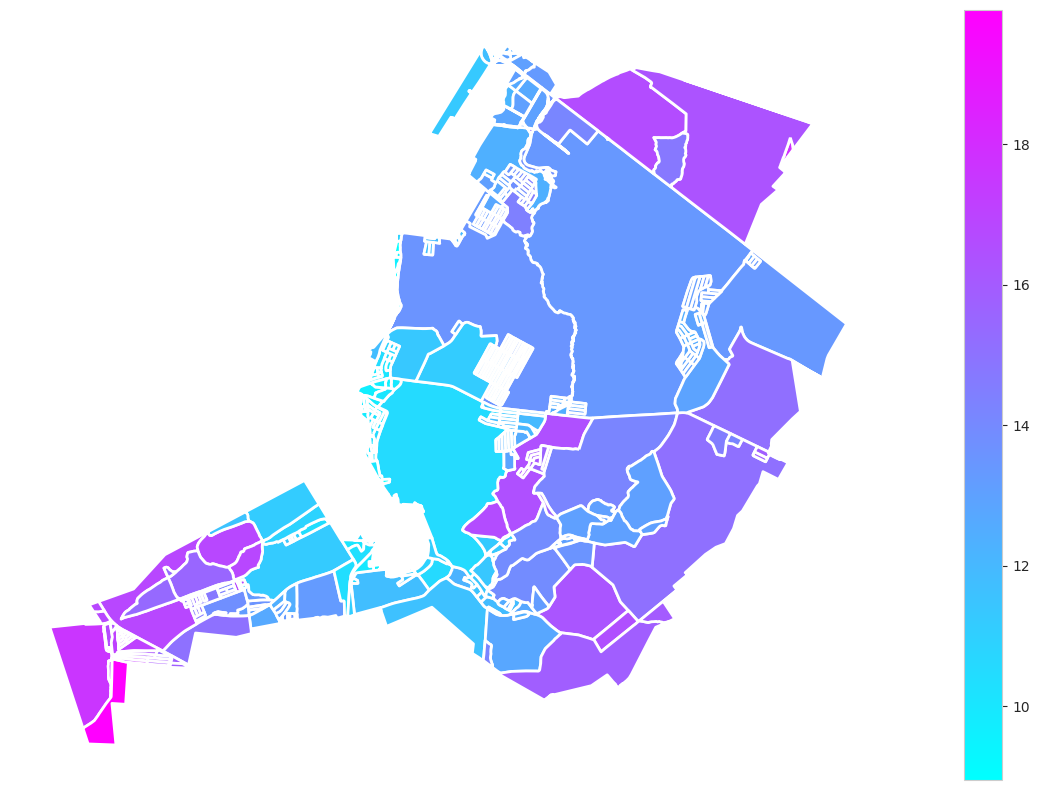

In [46]:
connectivity = Connectivity(city_model=city)
connectivity_result = connectivity.calculate()

Connectivity.plot(connectivity_result, linewidth=2, figsize=(20,10))

In [47]:
connectivity_result.to_file(os.path.join(data_path, 'connectivity.geojson'))